In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
import super_sort as ssort

# Generate Test Data

test key generated


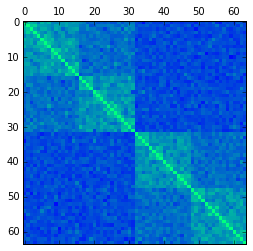

In [4]:
test_solution = ssort.generate_test_data()
plt.matshow(test_solution, vmin=0.1, vmax=0.8, cmap='winter')
plt.show()

# Shuffle Matrix Order

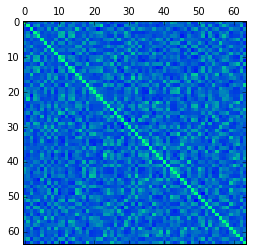

In [5]:
n = len(test_solution)
order = np.arange(n)
random.shuffle(order)
test = test_solution[:, order][order, :]
plt.matshow(test, vmin=0.1, vmax=0.8, cmap='winter')
plt.show()

# Run Reorder

In [6]:
cm = ssort.ClusterMatrix(test)

# reorder using simulated annealing
ds_result, ds_order = cm.deep_sort()

# reorder using heirarchical clustering
hc_result, hc_order = cm.hierarchical_clustering()

0.001 0.7692307692307693 1078.8341253138806 770.0 0 104
0.000904792147113709 0.5673076923076923 1082.3957387821488 568.0 0 104
0.0008186488294786356 0.6634615384615384 1094.8307090738945 664.0 0 104
0.0007407070321560992 0.4807692307692308 1105.486797305788 481.0 1 104
0.0006701859060067401 0.6057692307692307 1111.9583808876014 606.0 1 104
0.0006063789448611847 0.5480769230769231 1115.0501590117601 549.0 0 104
0.0005486469074854967 0.47115384615384615 1115.587411206911 472.0 2 104
0.0004964114134310989 0.5288461538461539 1115.7121926137522 529.0 1 104
0.000449149148610075 0.625 1121.8463707986045 625.0 0 104
0.0004063866225452041 0.5480769230769231 1123.2090674975152 549.0 1 104
0.0003676954247709636 0.5192307692307693 1123.2090674975152 520.0 1 104
0.0003326879328624074 0.47115384615384615 1125.5759133452996 472.0 0 104
0.00030101342909339904 0.49038461538461536 1125.5759133452996 491.0 1 104
0.0002723545868194767 0.49038461538461536 1125.5759133452996 491.0 3 104
0.000246424291384661

/Users/peterwinter/Code/reorder/super_sort.py:88: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if array == None:
/Users/peterwinter/Code/reorder/super_sort.py:59: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if matrix == None:


In [7]:
print('result = reordered array')
print(type(ds_result))
print(ds_result.shape)

print()

print('order = new order of array in terms of initial indicies')
print(type(ds_order))
print(ds_order)

result = reordered array
<class 'super_sort.ClusterMatrix'>
(64, 64)

order = new order of array in terms of initial indicies
<class 'numpy.ndarray'>
[28 46 52  7 49  2 15 59 48 33 55  9 31 16 24 37 63 18 34 27 12 25 54  5 38
 61 23 41 45 60 39 35 21 62 26  3 11 22 10 53 58  1 29 51 13 57 14  4  0 19
 30 56  8 44 20 36 32 47  6 50 17 42 40 43]


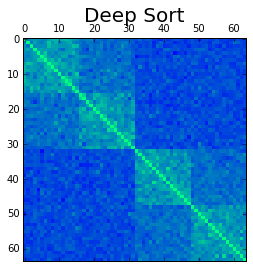

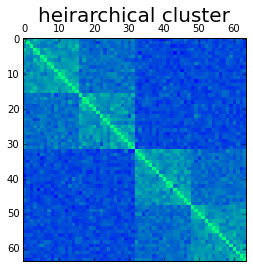

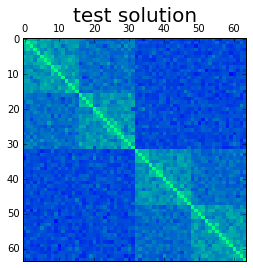

In [8]:
fig, ax = plt.subplots()
ax.matshow(ds_result, vmin=0.1, vmax=0.8, cmap='winter')
ax.set_title('Deep Sort', size=20)
plt.show()

fig, ax = plt.subplots()
ax.matshow(hc_result, vmin=0.1, vmax=0.8, cmap='winter')
ax.set_title('heirarchical cluster', size=20)
plt.show()

fig, ax = plt.subplots()
ax.matshow(test_solution, vmin=0.1, vmax=0.8, cmap='winter')
ax.set_title('test solution', size=20)
plt.show()